# corr_ratio_fvalue

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import scipy.stats
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# マンガでわかる統計学: p121-126
observed = pd.DataFrame({
    "1_t": [23, 26, 27, 28, np.nan, np.nan],
    "2_sha": [25, 26, 29, 32, 33, np.nan],
    "3_ba": [15, 16, 18, 22, 26, 29]
})
observed

,1_t,2_sha,3_ba
0,23.0,25.0,15
1,26.0,26.0,16
2,27.0,29.0,18
3,28.0,32.0,22
4,NaN,33.0,26
5,NaN,NaN,29


(10, 40)

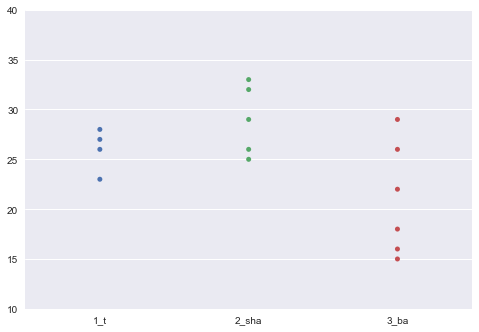

In [3]:
sns.swarmplot(data=observed)
plt.ylim(10, 40)

In [4]:
def corr_ratio(observed):
    # 級内変動
    ssw = ((observed - observed.mean()) ** 2).sum().sum()

    # 級間変動
    ssb = (observed.count() * ((observed.mean() - np.nanmean(observed)) ** 2)).sum()

    # sst
    sst = ((observed - np.nanmean(observed)) ** 2).sum().sum()

    # 相関比
    ratio = ssb / (ssb + ssw)
    
    # F
    dfn = observed.shape[1] - 1
    dfd = (observed.count() - 1).sum()
    f = (ssb / dfn) / (ssw / dfd)
    
    # p
    p = scipy.stats.f.sf(f, dfn, dfd)
    
    return (ssw, ssb, ratio, sst, f, p)


In [5]:
corr_ratio(observed)

(224.0,
 180.0,
 0.44554455445544555,
 404.0,
 4.821428571428571,
 0.029053597747097693)

In [6]:
scipy.stats.f_oneway(observed["1_t"].dropna(),
                             observed["2_sha"].dropna(),
                             observed["3_ba"].dropna())

F_onewayResult(statistic=4.8214285714285712, pvalue=0.029053597747097693)

In [7]:
# https://en.wikipedia.org/wiki/Correlation_ratio
df_math_scores = pd.DataFrame({
    "Algebra": [45, 70, 29, 15, 21, np.nan],
    "Geometry": [40, 20, 30, 42, np.nan, np.nan],
    "Statistics": [65, 95, 80, 70, 85, 73]
})


$$
\eta ^{2}={\frac  {6780}{9640}}=0.7033\ldots 
$$

In [8]:
corr_ratio(df_math_scores)

(2860.0,
 6780.0,
 0.7033195020746889,
 9640.0,
 14.223776223776223,
 0.000681920890799404)

In [9]:
sum(corr_ratio(df_math_scores)[:2])

9640.0